<a href="https://colab.research.google.com/github/taherafirdose/Artifical-Mini/blob/main/Group6_Project_phase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the data and liberaries

In [ ]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
from collections import Counter
from wordcloud import WordCloud
from matplotlib import rcParams
from sklearn.feature_extraction.text import TfidfVectorizer 
import seaborn as sns
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding


In [ ]:
!wget --no-check-certificate https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Software_5.json.gz

--2023-03-07 21:43:59--  https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Software_5.json.gz
Resolving jmcauley.ucsd.edu (jmcauley.ucsd.edu)... 137.110.160.73
Connecting to jmcauley.ucsd.edu (jmcauley.ucsd.edu)|137.110.160.73|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 5339013 (5.1M) [application/x-gzip]
Saving to: ‘Software_5.json.gz.4’

Software_5.json.gz. 100%[===================>]   5.09M  19.3MB/s    in 0.3s    

2023-03-07 21:44:00 (19.3 MB/s) - ‘Software_5.json.gz.4’ saved [5339013/5339013]



**Data Exploration**

In [ ]:
# loading the data

data = []
with gzip.open('Software_5.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

12805
{'overall': 4.0, 'verified': False, 'reviewTime': '10 20, 2010', 'reviewerID': 'A38NELQT98S4H8', 'asin': '0321719816', 'style': {'Format:': ' DVD-ROM'}, 'reviewerName': 'WB Halper', 'reviewText': "I've been using Dreamweaver (and it's predecessor Macromedia's UltraDev) for many years.  For someone who is an experienced web designer, this course is a high-level review of the CS5 version of Dreamweaver, but it doesn't go into a great enough level of detail to find it very useful.\n\nOn the other hand, this is a great tool for someone who is a relative novice at web design.  It starts off with a basic overview of HTML and continues through the concepts necessary to build a modern web site.  Someone who goes through this course should exit with enough knowledge to create something that does what you want it do do...within reason.  Don't expect to go off and build an entire e-commerce system with only this class under your belt.\n\nIt's important to note that there's a long gap from s

In [ ]:
# convert list into pandas dataframe

df = pd.DataFrame.from_dict(data)

df.shape

(12805, 12)

In [ ]:
df = df.sample(1000, random_state = 42)

# Data Exploration

In [ ]:
#information of columns
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 10192 to 10646
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         1000 non-null   float64
 1   verified        1000 non-null   bool   
 2   reviewTime      1000 non-null   object 
 3   reviewerID      1000 non-null   object 
 4   asin            1000 non-null   object 
 5   style           542 non-null    object 
 6   reviewerName    1000 non-null   object 
 7   reviewText      1000 non-null   object 
 8   summary         1000 non-null   object 
 9   unixReviewTime  1000 non-null   int64  
 10  vote            292 non-null    object 
 11  image           8 non-null      object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 94.7+ KB
None


In [ ]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
10192,5.0,False,"12 4, 2014",AQ9JTZBF30IW0,B00O2KAI2Y,NaN,D.J. Frazier,I really love this reading program and I use i...,I really love this reading program and I use i...,1417651200,NaN,NaN
12413,5.0,False,"01 10, 2015",A2F2Y0BJS7V49Y,B001GL6QDM,"{'Format:': ' Box', 'Platform:': ' PC/Mac Disc'}",Jeanne,as described,Five Stars,1420848000,NaN,NaN
1358,4.0,False,"09 18, 2009",A5GPH59NDWJRB,B000H2049I,NaN,Space Salamander,I had version 7-- and wrote a pretty scathing ...,Leaps and Bounds Ahead of the Old Versions,1253232000,3,NaN
6595,1.0,False,"11 8, 2012",A1H86HVCP8047N,B008H3SW4I,{'Format:': ' Software'},landover,Windows 8 is the worst mistake in Microsoft's ...,Microsoft biggest software mistake...,1352332800,11,NaN
7458,4.0,False,"08 12, 2013",A25UZ7MA72SMKM,B00CNLGONQ,NaN,Brent Butler,Most people know that Sage 50 in its various i...,"Great software, not so much for licensing",1376265600,NaN,NaN


In [ ]:
#How many Null values?

df.isnull().sum()

overall             0
verified            0
reviewTime          0
reviewerID          0
asin                0
style             458
reviewerName        0
reviewText          0
summary             0
unixReviewTime      0
vote              708
image             992
dtype: int64

In [ ]:
# Average rating for all the products 
average_rating = df["overall"].mean()
print(average_rating)

3.87


In [ ]:
# Count of each rating

df['overall'].value_counts()

5.0    447
4.0    250
3.0    135
1.0    106
2.0     62
Name: overall, dtype: int64

Note: Probably will drop style, vote, and image column

In [ ]:
# Group the reviews by product and count the number of reviews for each product
review_count_per_product = df.groupby("asin").size()
print(review_count_per_product)

asin
0321700945    1
0321719816    1
0321719824    1
0763855553    3
0982697813    1
             ..
B01CS8RSIS    4
B01EB06QUM    3
B01F4PYHX6    1
B01F7RJHIQ    5
B01HAP47PQ    2
Length: 477, dtype: int64


In [ ]:
# Calculaating Number of reviews for each products 
df['asin'].value_counts()

B0000AZJY6    28
B000050ZRE    22
B0001FS9NE    18
B000EORV8Q    16
B00MYXTCGY    11
              ..
B000AOBSTS     1
B00NG7JYYM     1
B00M9GTEPA     1
B0013IRKCY     1
B00O2KAI2Y     1
Name: asin, Length: 477, dtype: int64

In [ ]:
# Distribution of the number of reviews per product

print('average review per products is : ', review_count_per_product.mean())
print('Maximum review per product is : ', review_count_per_product.max())
print('Minimmum review per product is : ', review_count_per_product.min())


average review per products is :  2.0964360587002098
Maximum review per product is :  28
Minimmum review per product is :  1


Text(0, 0.5, 'Number of Reviews')

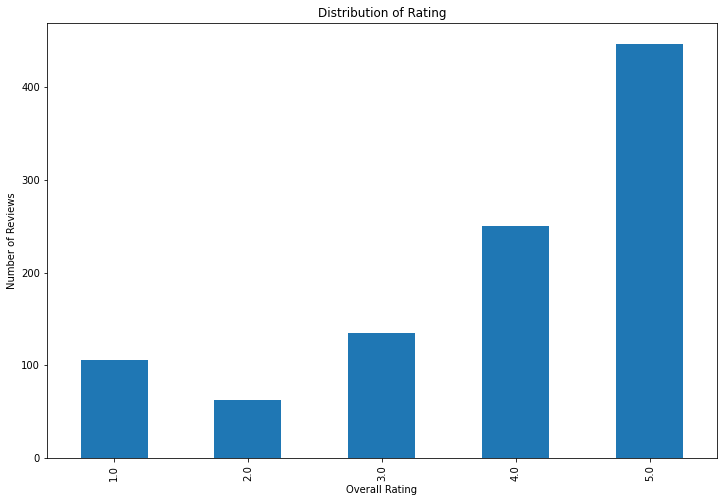

In [ ]:
# Plotting Distribution of Rating


import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
# sns.countplot(df['overall'])
df['overall'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Reviews')


In [ ]:
# Calculating review per user

review_count_per_user = df.groupby("reviewerName").size().sort_values(ascending=False)
print(review_count_per_user)



reviewerName
Amazon Customer           23
Greeny                     6
! MR. KNOW IT ALL  ;-b     5
Elizabeth Slater           4
Jerry Saperstein           4
                          ..
James McDonald             1
James Vaughn               1
JamieHyde                  1
Jan                        1
x                          1
Length: 736, dtype: int64


In [ ]:
review_count_per_user = df.groupby("reviewerID").size().sort_values(ascending=False)
print(review_count_per_user)

df.loc[df['reviewerID'] == review_count_per_user.idxmax()]


reviewerID
A3NHUQ33CFH3VM    6
A1ER6IYOMM8VCT    5
A1UQUDT2Q0YENM    4
A3M1PA1C98XNGN    4
AHQRU3MRORIWQ     4
                 ..
A2DXENZNO2JT4F    1
A2E1EFNIZL2FVA    1
A2EY1MSMXO6LQ     1
A2F2S1L61X1LA9    1
AZYJE40XW6MFG     1
Length: 758, dtype: int64


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
4315,2.0,False,"01 10, 2010",A3NHUQ33CFH3VM,B002EAYJD8,"{'Format:': ' Box', 'Platform:': ' PC Disc'}",Greeny,I've tried to figure out how ratings of antivi...,So-So Threat Detection that Trend Micro later ...,1263081600,NaN,NaN
5852,2.0,True,"11 16, 2013",A3NHUQ33CFH3VM,B005FDK7J6,{'Format:': ' Software'},Greeny,I now wish I simply went with Boot Camp. This...,Not recommended,1384560000,NaN,NaN
12285,2.0,True,"09 5, 2011",A3NHUQ33CFH3VM,B000IAMRXK,NaN,Greeny,Norton has come a long way since this version....,Not user friendly,1315180800,NaN,NaN
4345,5.0,False,"11 12, 2009",A3NHUQ33CFH3VM,B002EAYJEM,"{'Format:': ' Box', 'Platform:': ' PC Disc'}",Greeny,I installed Trend Micro on Vista. Installatio...,Suites my humble needs just fine,1257984000,NaN,NaN
5834,3.0,False,"09 16, 2012",A3NHUQ33CFH3VM,B005CY41BI,NaN,Greeny,This version of McAfee presented a drag to my ...,Needs development to work better with Macs,1347753600,2,NaN
6338,5.0,False,"03 16, 2013",A3NHUQ33CFH3VM,B0066H890O,{'Platform:': ' Mac Disc'},Greeny,Norton didn't slow down my Mac or give me any ...,"Easy, no issues",1363392000,NaN,NaN


In [ ]:
#Number of ratings per products and its rate
reviews_per_product = df.groupby(['overall','asin'])['asin'].aggregate('count')
print(reviews_per_product.sample(10))



overall  asin      
4.0      B001VGZLQ0    1
5.0      B001W2Y5Q0    1
3.0      B000PC1IR2    1
5.0      B001AMPP0W    1
1.0      B00FYH8URE    1
5.0      B002DHLUWK    2
4.0      B01617VPUY    2
         B002I7LYBC    2
         B0144NYEY6    1
5.0      B011XO53WQ    1
Name: asin, dtype: int64


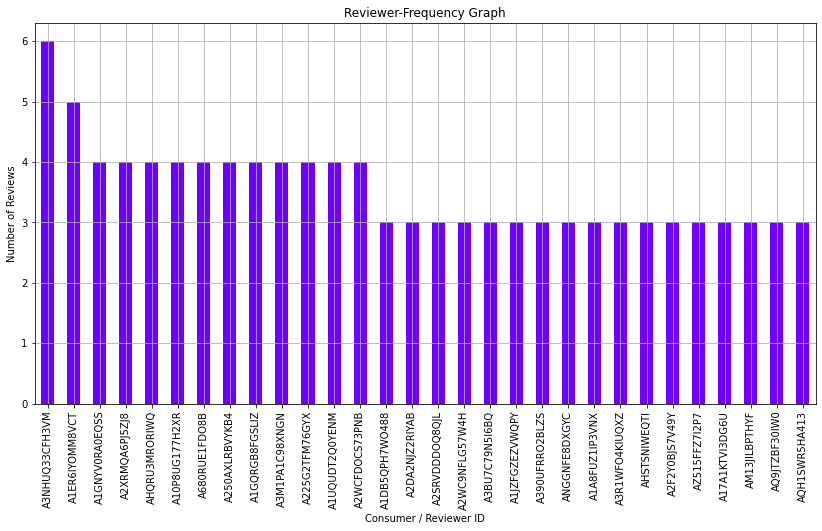

In [ ]:
def most_frequent_users_graph(df, log=False):
    df['reviewerID'].value_counts().nlargest(30).plot(kind='bar', log=log, figsize=(14,7), grid=True, color="#6f00ff")
    plt.title("Reviewer-Frequency Graph")
    plt.xlabel("Consumer / Reviewer ID")
    plt.ylabel("Number of Reviews")
    plt.show()

most_frequent_users_graph(df)

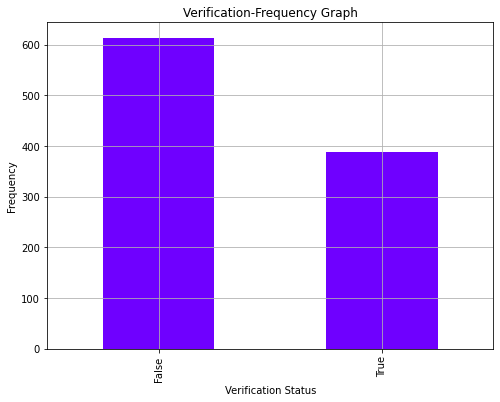

In [ ]:
def verified_reviews_graph(df, log=False):
    df.verified.value_counts().plot(kind='bar', log=log, figsize=(8,6), grid=True, color="#6f00ff")
    plt.title("Verification-Frequency Graph")
    plt.xlabel("Verification Status")
    plt.ylabel("Frequency")
    plt.show()

verified_reviews_graph(df, log=False)

In [ ]:
min_max_rating_perproduct = df.groupby('asin')['overall'].aggregate(['min','max'])
min_max_rating_perproduct.sample(10)

,min,max
asin,,
B00EZPXOTA,5.0,5.0
B000WQ10LK,5.0,5.0
B0014X2UAK,5.0,5.0
B009716H00,5.0,5.0
B00E6OPDUS,5.0,5.0
B00EZKNYWC,5.0,5.0
B0052VKOYO,1.0,1.0
B01617VNBK,5.0,5.0
0321700945,3.0,3.0


In [ ]:
def avg_rating(df):

    grouped_df = df.groupby(['asin'])['overall'].agg(['count','mean']).reset_index()
    return grouped_df.round({'mean':1})


In [ ]:

def product_most_sold(df, log=False):
    df = avg_rating(df).nlargest(30, 'count')

    fig = px.bar(df, y='count', x='asin', text='mean', log_y=log)
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',
                      autosize=False,
                      width=900, height=600,
                      margin=dict(l=20, r=50, t=50, b=20),
                      title='Product Frequency with Average Rating',
                      xaxis_title="Product",
                      yaxis_title="Frequency")
    fig.show()
product_most_sold(df, log=False)

In [ ]:
def product_least_sold(df, log=False):
    df = avg_rating(df).nsmallest(30, 'count')

    fig = px.bar(df, y='count', x='asin', text='mean', log_y=log)
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',
                      autosize=False,
                      width=900, height=600,
                      margin=dict(l=20, r=50, t=50, b=20),
                      title='Product Frequency with Average Rating',
                      xaxis_title="Product",
                      yaxis_title="Frequency")
    fig.show()

product_least_sold(df, log=False)

In [ ]:
# Year of the ratings
#df['year'] = pd.DatetimeIndex(df['reviewTime']).year

#df.head()

In [ ]:
#Year vs Sentiment count

# df.groupby(['year','rating_of_the_product'])['rating_of_the_product'].count().unstack().plot(legend=True)
# plt.title('Year and Sentiment count')
# plt.xlabel('Year')
# plt.ylabel('Sentiment count')
# plt.show()

In [ ]:
# df = df.drop(['year'])

# Data Preprocessing

Labeling in 3 categories

In [ ]:
def label_data(rating):
    if rating in [4, 5]:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif rating in [1, 2]:
        return "Negative"

# Apply the function to the "rating" column
df["rating_of_the_product"] = df["overall"].apply(label_data)


In [ ]:
df["rating_of_the_product"].value_counts()

Positive    697
Negative    168
Neutral     135
Name: rating_of_the_product, dtype: int64

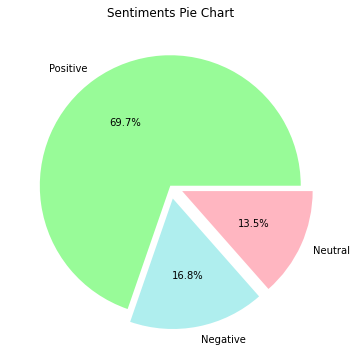

In [ ]:
colors= ['palegreen','paleturquoise','lightpink']
ax = (df['rating_of_the_product']).value_counts().plot(kind='pie', title='Sentiments Pie Chart', colors = colors,autopct='%1.1f%%',  explode=(0,0.1,0.1),figsize=(11, 6))
ax.yaxis.set_visible(False)

Dropping useless columns

with respect to Null values, we know that 3 columns of Image,Style and vote should be dropped.

In [ ]:
df.isnull().sum()

overall                    0
verified                   0
reviewTime                 0
reviewerID                 0
asin                       0
style                    458
reviewerName               0
reviewText                 0
summary                    0
unixReviewTime             0
vote                     708
image                    992
rating_of_the_product      0
dtype: int64

In [ ]:
print(df['reviewerName'])
print(df['unixReviewTime'])

10192        D.J. Frazier
12413              Jeanne
1358     Space Salamander
6595             landover
7458         Brent Butler
               ...       
5802             deanie11
6180            SunbowSue
1839        Walt Esquivel
6778                  tee
10646     Amazon Customer
Name: reviewerName, Length: 1000, dtype: object
10192    1417651200
12413    1420848000
1358     1253232000
6595     1352332800
7458     1376265600
            ...    
5802     1461110400
6180     1374192000
1839     1393027200
6778     1434585600
10646    1463529600
Name: unixReviewTime, Length: 1000, dtype: int64


Also, we can drop reviewer name as we already have the ID for them and this column is uselsee.

This column is also a useless column as we already have the time of the review and this unix time won't be usefull for our model.

### Dropping useless columns

In [ ]:
df = df.drop(['unixReviewTime','reviewerName','style','image','vote','overall','verified','reviewTime'], axis = 1)

In [ ]:
df.head()

,reviewerID,asin,reviewText,summary,rating_of_the_product
10192,AQ9JTZBF30IW0,B00O2KAI2Y,I really love this reading program and I use i...,I really love this reading program and I use i...,Positive
12413,A2F2Y0BJS7V49Y,B001GL6QDM,as described,Five Stars,Positive
1358,A5GPH59NDWJRB,B000H2049I,I had version 7-- and wrote a pretty scathing ...,Leaps and Bounds Ahead of the Old Versions,Positive
6595,A1H86HVCP8047N,B008H3SW4I,Windows 8 is the worst mistake in Microsoft's ...,Microsoft biggest software mistake...,Negative
7458,A25UZ7MA72SMKM,B00CNLGONQ,Most people know that Sage 50 in its various i...,"Great software, not so much for licensing",Positive


### Cleaning the text

In [ ]:
# def decontracted(phrase):
#     phrase = re.sub(r"\'t", "not", phrase)
#     return phrase

# df['clean_text'] = df['reviewText'].apply(lambda x: decontracted(x))
# df['clean_summary'] = df['summary'].apply(lambda x: decontracted(x))


In [ ]:
def remove_spl_chars(text):
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = re.sub('\s+', ' ', text)
    text=text.lower()
    return text

df['clean_text'] = df['reviewText'].apply(lambda x: remove_spl_chars(x))
df['clean_summary'] = df['summary'].apply(lambda x: remove_spl_chars(x))


In [ ]:
def remove_punctuations(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('', '', punctuations))

    
df['clean_text'] = df['clean_text'].apply(lambda x: remove_punctuations(x))
df['clean_summary'] = df['summary'].apply(lambda x: remove_punctuations(x))


### Dealing with Stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
negative_words = ["no", "not", "don't", "shouldn't", "couldn't", "wasn't", "weren't", "isn't", "aren't", "doesn't", "didn't", "haven't", "hasn't", "hadn't"]

negative_stop_words = list(filter(lambda x: x in negative_words, stop_words))

for word in negative_stop_words:
    print(word)


not
don't
shouldn't
weren't
haven't
isn't
didn't
couldn't
wasn't
no
hadn't
aren't
hasn't
doesn't


In [ ]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

negative_words = ["no", "not", "don't", "shouldn't", "couldn't", "wasn't", "weren't", "isn't", "aren't", "doesn't", "didn't", "haven't", "hasn't", "hadn't"]

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_sentence = []
    for w in word_tokens:
        if w in negative_words:
            filtered_sentence.append(w)
        elif w not in stop_words:
            filtered_sentence.append(w)
    return ' '.join(filtered_sentence)


df['clean_text']  = df['clean_text'] .apply(lambda x: remove_stopwords(x))
df['clean_summary'] = df['summary'].apply(lambda x: remove_stopwords(x))



In [ ]:
# nltk.download('punkt')
# nltk.download('stopwords')

# # we will need not
# stop_words = set(stopwords.words('english'))
# stop_words.remove('not')


# def remove_stopwords(text):
#     word_tokens = word_tokenize(text)
#     filtered_sentence = [w for w in word_tokens if not w in stop_words]
#     return ' '.join(filtered_sentence)

# df['clean_text']  = df['clean_text'] .apply(lambda x: remove_stopwords(x))
# df['clean_summary'] = df['summary'].apply(lambda x: remove_stopwords(x))


In [ ]:
df['length'] = df['clean_text'].str.split(" ").apply(len) 
df['length']

10192     41
12413      1
1358     105
6595      32
7458     350
        ... 
5802       8
6180      13
1839      32
6778      13
10646      1
Name: length, Length: 1000, dtype: int64

In [ ]:
fig = px.histogram(df, x='length', template='plotly_white', title='Comments counts by length')
fig.update_xaxes(categoryorder='total descending', title='Number of words').update_yaxes(title='Number of rows')
fig.show()

<AxesSubplot:>

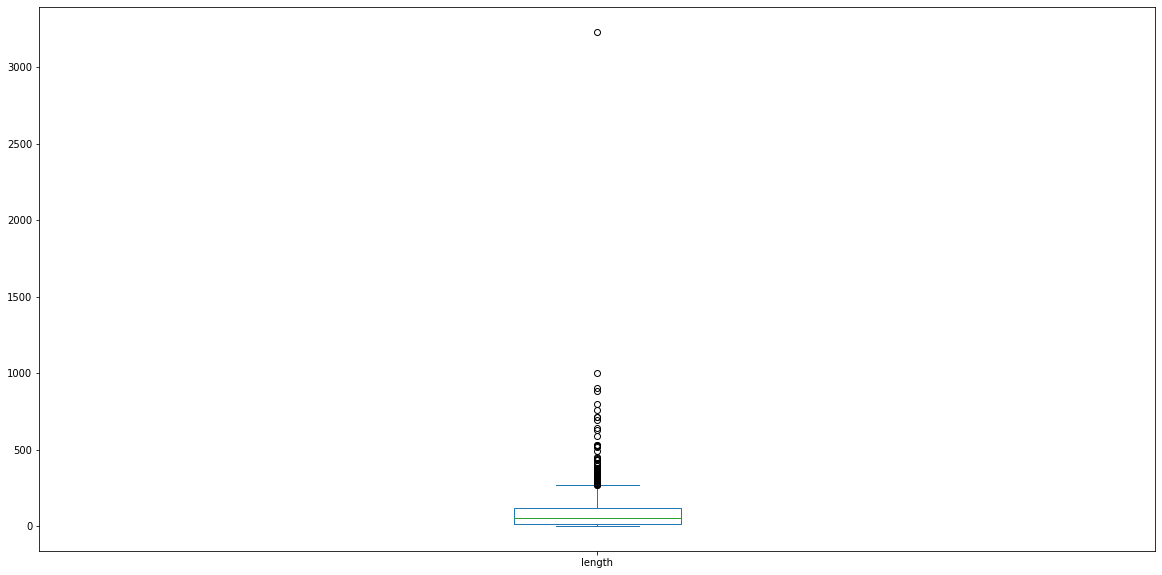

In [ ]:
plt.figure(figsize=(20,10))
df['length'].plot(kind = 'box')

In [ ]:
length = df['length'].sort_values(ascending = True)

In [ ]:
# Avg length of reviews
length.mean()

92.539

In [ ]:
length

10646       1
10546       1
11602       1
8642        1
11879       1
         ... 
4023      798
7873      883
7346      903
47       1003
6030     3232
Name: length, Length: 1000, dtype: int64

In [ ]:
less_than_10_words = ['yes' if i < 3 else 'No'for i in length]
df.groupby(less_than_10_words).count()

,reviewerID,asin,reviewText,summary,rating_of_the_product,clean_text,clean_summary,length
No,945,945,945,945,945,945,945,945
yes,55,55,55,55,55,55,55,55


In [ ]:
more_than_190_words = ['yes' if i > 190 else 'No'for i in length]
df.groupby(more_than_190_words).count()

,reviewerID,asin,reviewText,summary,rating_of_the_product,clean_text,clean_summary,length
No,875,875,875,875,875,875,875,875
yes,125,125,125,125,125,125,125,125


In [ ]:
df = df[df['length']<200]
df = df[df['length']>2]
df.shape

(833, 8)

<AxesSubplot:>

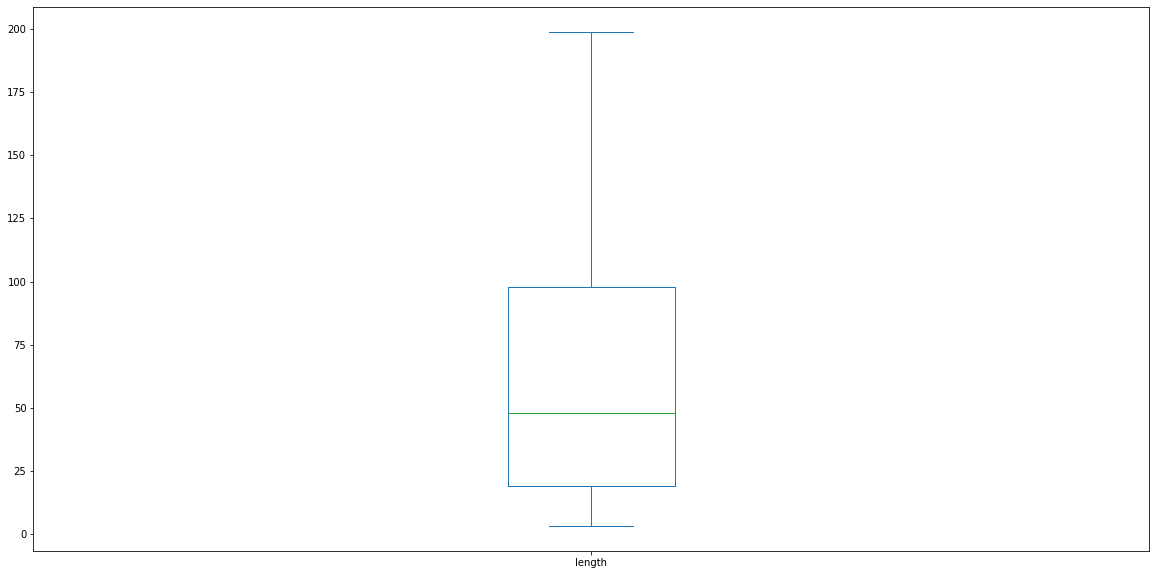

In [ ]:
plt.figure(figsize=(20,10))
df['length'].plot(kind = 'box')

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from collections import Counter

stop_words = set(stopwords.words('english'))

# Generate list of all bi-grams in clean_text column
all_bigrams = []
for text in df["clean_text"].values:
    tokens = [word for word in text.split()]
    bigrams = ngrams(tokens, 2)
    all_bigrams += bigrams
    
# Count frequency of each bi-gram
bigram_counts = Counter(all_bigrams)

# Print top 20 most common bi-grams
bigram_counts.most_common(20)


[(('easy', 'use'), 66),
 (('trend', 'micro'), 54),
 (('turbo', 'tax'), 42),
 (('internet', 'security'), 40),
 (('h', 'r'), 40),
 (('r', 'block'), 35),
 (('anti', 'virus'), 34),
 (('easy', 'install'), 31),
 (('hard', 'drive'), 31),
 (('photo', 'editing'), 28),
 (('no', 'problems'), 27),
 (('user', 'interface'), 27),
 (('last', 'year'), 25),
 (('works', 'great'), 25),
 (('security', 'software'), 25),
 (('microsoft', 'office'), 24),
 (('operating', 'system'), 24),
 (('could', 'not'), 23),
 (('windows', 'xp'), 23),
 (('years', 'ago'), 22)]

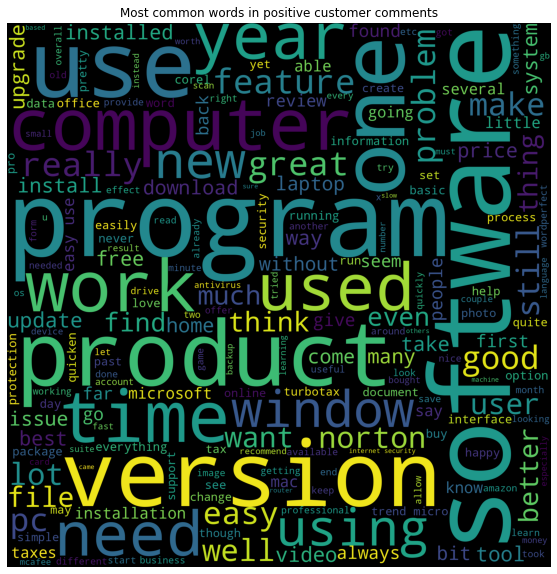

In [ ]:
#word plot for positive reviews

wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['rating_of_the_product']=='Positive','clean_text'].tolist()))

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.title("Most common words in positive customer comments")
plt.axis('off')
plt.show()

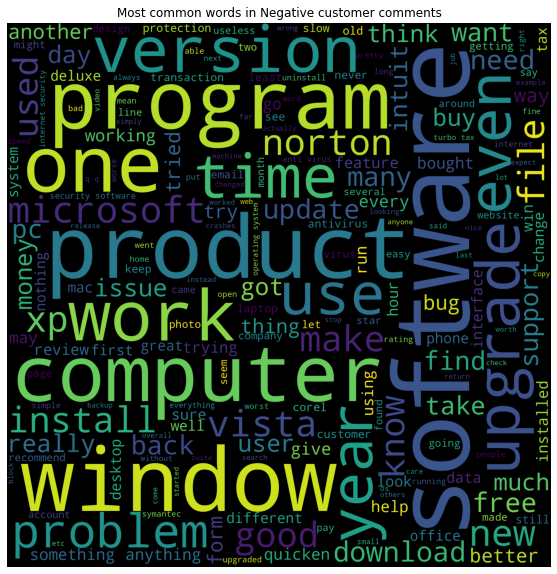

In [ ]:
#word plot for negative reviews

from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['rating_of_the_product']=='Negative','clean_text'].tolist()))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.title("Most common words in Negative customer comments")
plt.axis('off')
plt.show()

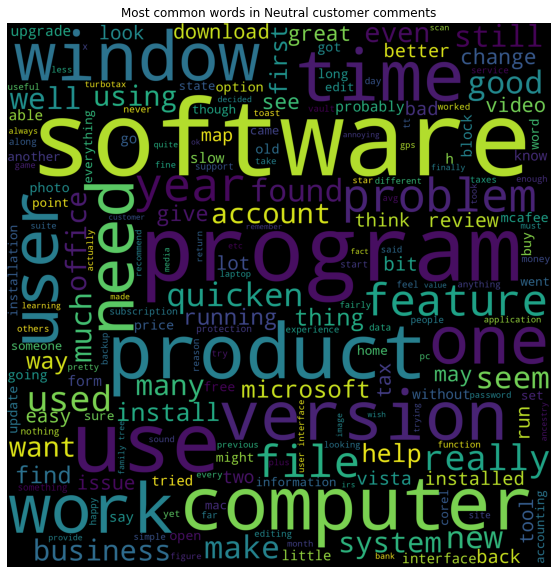

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='black')
wordcloud = wordcloud.generate(' '.join(df.loc[df['rating_of_the_product']=='Neutral','clean_text'].tolist()))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.title("Most common words in Neutral customer comments")
plt.axis('off')
plt.show()

In [ ]:
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn)


getMostCommon(df['clean_text'],topn=20)

[('not', 732),
 ('software', 633),
 ('use', 426),
 ('program', 380),
 ('product', 347),
 ('one', 325),
 ('version', 324),
 ('like', 307),
 ('windows', 293),
 ('get', 291),
 ('time', 269),
 ('would', 267),
 ('computer', 245),
 ('no', 240),
 ('used', 239),
 ('good', 237),
 ('easy', 234),
 ('new', 219),
 ('great', 214),
 ('using', 209)]

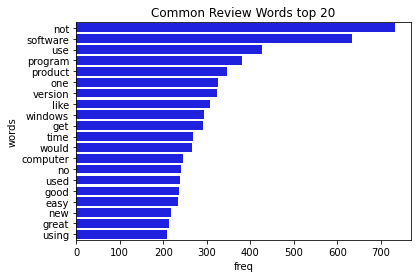

In [ ]:
def plotMostCommonWords(reviews_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))

plotMostCommonWords(df['clean_text'],topn=20,title="Common Review Words",color="blue",axis=None)

In [ ]:
from collections import Counter
from nltk.util import ngrams

def getMostCommon(reviews_list, n=1, topn=20):
    reviews = " ".join(reviews_list)
    tokenised_reviews = reviews.split(" ")
    
    if n == 1:
        # Use unigrams
        freq_counter = Counter(tokenised_reviews)
    elif n == 2:
        # Use bigrams
        bigrams = ngrams(tokenised_reviews, n)
        freq_counter = Counter(bigrams)
    else:
        raise ValueError("n must be 1 or 2")
    
    return freq_counter.most_common(topn)

# Example usage to get most common bigrams in positive reviews
print('Most common bigrams in Positive Reviews')
getMostCommon(df.loc[df['rating_of_the_product']=='Positive','clean_text'], n=2, topn=20)


Most common bigrams in Positive Reviews


[(('easy', 'use'), 59),
 (('trend', 'micro'), 46),
 (('internet', 'security'), 30),
 (('turbo', 'tax'), 27),
 (('easy', 'install'), 25),
 (('no', 'problems'), 23),
 (('photo', 'editing'), 23),
 (('works', 'great'), 22),
 (('hard', 'drive'), 21),
 (('anti', 'virus'), 21),
 (('years', 'ago'), 20),
 (('microsoft', 'office'), 19),
 (('video', 'editing'), 18),
 (('good', 'product'), 18),
 (('last', 'year'), 18),
 (('windows', 'xp'), 18),
 (('h', 'r'), 18),
 (('highly', 'recommend'), 17),
 (('great', 'product'), 16),
 (('user', 'interface'), 16)]

In [ ]:
def getMostCommon(reviews_list, n=1, topn=20):
    reviews = " ".join(reviews_list)
    tokenised_reviews = reviews.split(" ")
    
    if n == 1:
        # Use unigrams
        freq_counter = Counter(tokenised_reviews)
    elif n == 2:
        # Use bigrams
        bigrams = ngrams(tokenised_reviews, n)
        freq_counter = Counter(bigrams)
    else:
        raise ValueError("n must be 1 or 2")
    
    return freq_counter.most_common(topn)

# Example usage to get most common bigrams in Negative reviews
print('Most common bigrams in Negative Reviews')
getMostCommon(df.loc[df['rating_of_the_product']=='Negative','clean_text'], n=2, topn=20)


Most common bigrams in Negative Reviews


[(('security', 'software'), 11),
 (('would', 'not'), 10),
 (('anti', 'virus'), 10),
 (('q', 'q'), 9),
 (('turbo', 'tax'), 9),
 (('internet', 'security'), 9),
 (('operating', 'system'), 9),
 (('not', 'work'), 8),
 (('blue', 'screen'), 7),
 (('learning', 'curve'), 7),
 (('trend', 'micro'), 7),
 (('could', 'not'), 7),
 (('not', 'install'), 6),
 (('using', 'quicken'), 6),
 (('hard', 'drive'), 6),
 (('software', 'not'), 6),
 (('e', 'file'), 6),
 (('not', 'even'), 6),
 (('h', 'r'), 6),
 (('r', 'block'), 6)]

In [ ]:
def getMostCommon(reviews_list, n=1, topn=20):
    reviews = " ".join(reviews_list)
    tokenised_reviews = reviews.split(" ")
    
    if n == 1:
        # Use unigrams
        freq_counter = Counter(tokenised_reviews)
    elif n == 2:
        # Use bigrams
        bigrams = ngrams(tokenised_reviews, n)
        freq_counter = Counter(bigrams)
    else:
        raise ValueError("n must be 1 or 2")
    
    return freq_counter.most_common(topn)

# Example usage to get most common bigrams in Neutral reviews
print('Most common bigrams in Neutral Reviews')
getMostCommon(df.loc[df['rating_of_the_product']=='Neutral','clean_text'], n=2, topn=20)


Most common bigrams in Neutral Reviews


[(('h', 'r'), 16),
 (('r', 'block'), 16),
 (('user', 'interface'), 9),
 (('family', 'tree'), 8),
 (('use', 'software'), 7),
 (('not', 'bad'), 7),
 (('easy', 'use'), 6),
 (('turbo', 'tax'), 6),
 (('ancestry', 'com'), 6),
 (('not', 'sure'), 6),
 (('easier', 'use'), 6),
 (('last', 'year'), 5),
 (('data', 'file'), 5),
 (('easy', 'install'), 5),
 (('user', 'friendly'), 5),
 (('block', 'software'), 5),
 (('latest', 'version'), 5),
 (('streets', 'trips'), 5),
 (('paintshop', 'pro'), 5),
 (('express', 'lab'), 5)]

In [ ]:
tfidfconverter = TfidfVectorizer()  
tfidfconverter.fit_transform(df['clean_text'])

#tfidfconverter.vocabulary_


<833x6541 sparse matrix of type '<class 'numpy.float64'>'
	with 41464 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_df = pd.DataFrame(tfidfconverter.fit_transform(df['clean_text']).todense())
tfidf_df.columns = sorted(tfidfconverter.vocabulary_)
tfidf_df.head(10)


,aawot,ab,abandon,abdomen,abilities,ability,able,abort,aborting,absolute,...,zero,zillions,zines,zip,zipped,zone,zonealarm,zonelabs,zoom,zx
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.183824,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




```
# This is formatted as code
```

# Models

### Vader _ Only text column

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
analyser = SentimentIntensityAnalyzer()

def sentiment_scores(text):
    score = analyser.polarity_scores(text)
    print("{:-<40} {}".format(text, str(score)))

In [ ]:
df.head(5)

,reviewerID,asin,reviewText,summary,rating_of_the_product,clean_text,clean_summary,length
10192,AQ9JTZBF30IW0,B00O2KAI2Y,I really love this reading program and I use i...,I really love this reading program and I use i...,Positive,really love reading program use year old grand...,I really love reading program I use ...,41
1358,A5GPH59NDWJRB,B000H2049I,I had version 7-- and wrote a pretty scathing ...,Leaps and Bounds Ahead of the Old Versions,Positive,version wrote pretty scathing review amazon ca...,Leaps Bounds Ahead Old Versions,105
6595,A1H86HVCP8047N,B008H3SW4I,Windows 8 is the worst mistake in Microsoft's ...,Microsoft biggest software mistake...,Negative,windows worst mistake microsoft history sad fo...,Microsoft biggest software mistake ...,32
8546,A2A187H32FTQNH,B00F8K9MZQ,"It does its job, no problems, I got my refund ...",same as usuaL,Neutral,job no problems got refund days nothing much c...,usuaL,15
11102,A1LQ1MQNS5GKRQ,B01326J5MC,"Better than a few years ago, but not really us...",One Star,Negative,better years ago not really useful,One Star,6


In [ ]:
df_vader = df[['reviewText', 'rating_of_the_product']].reset_index()
df_vader.head()

,index,reviewText,rating_of_the_product
0,10192,I really love this reading program and I use i...,Positive
1,1358,I had version 7-- and wrote a pretty scathing ...,Positive
2,6595,Windows 8 is the worst mistake in Microsoft's ...,Negative
3,8546,"It does its job, no problems, I got my refund ...",Neutral
4,11102,"Better than a few years ago, but not really us...",Negative


In [ ]:
def remove_spl_chars_vendar(text):
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = re.sub('\s+', ' ', text)
    #text=text.lower()
    return text

df_vader['reviewText'] = df_vader['reviewText'].apply(lambda x: remove_spl_chars_vendar(x))
df_vader['reviewText']  = df_vader['reviewText'] .apply(lambda x: remove_stopwords(x))


In [ ]:
sentiment_scores(df_vader['reviewText'].iloc[2])

Windows worst mistake Microsoft history How sad After four frustrating days trying find something Windows make total loss direction Windows interface I went back Windows Store got money back Maybe Windows led new management vision {'neg': 0.33, 'neu': 0.625, 'pos': 0.045, 'compound': -0.9153}


In [ ]:
#Positive, negative and neutral results represent the proportion of the text that falls in these categories. This means that our opinion was rated as 60% neutral, 4% positive and 35% negative.. The Compound score is a metric that calculates the sum of all lexicon scores that have been normalized between -1 (most extreme negative) and +1 (most extreme positive). Compound is -0.93, which means very high negative sentiment.

In [ ]:
df_vader['Scores'] = df_vader['reviewText'].apply(lambda Review: analyser.polarity_scores(Review))
df_vader.head()

,index,reviewText,rating_of_the_product,Scores
0,10192,I really love reading program I use year old g...,Positive,"{'neg': 0.0, 'neu': 0.547, 'pos': 0.453, 'comp..."
1,1358,I version wrote pretty scathing review Amazon ...,Positive,"{'neg': 0.168, 'neu': 0.568, 'pos': 0.264, 'co..."
2,6595,Windows worst mistake Microsoft history How sa...,Negative,"{'neg': 0.33, 'neu': 0.625, 'pos': 0.045, 'com..."
3,8546,It job no problems I got refund days Nothing m...,Neutral,"{'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'comp..."
4,11102,Better years ago not really useful,Negative,"{'neg': 0.275, 'neu': 0.42, 'pos': 0.305, 'com..."


In [ ]:
df_vader['Compound_Score'] = df_vader['Scores'].apply(lambda score_dict: score_dict['compound'])
df_vader.head()

,index,reviewText,rating_of_the_product,Scores,Compound_Score
0,10192,I really love reading program I use year old g...,Positive,"{'neg': 0.0, 'neu': 0.547, 'pos': 0.453, 'comp...",0.9814
1,1358,I version wrote pretty scathing review Amazon ...,Positive,"{'neg': 0.168, 'neu': 0.568, 'pos': 0.264, 'co...",0.9184
2,6595,Windows worst mistake Microsoft history How sa...,Negative,"{'neg': 0.33, 'neu': 0.625, 'pos': 0.045, 'com...",-0.9153
3,8546,It job no problems I got refund days Nothing m...,Neutral,"{'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'comp...",-0.5994
4,11102,Better years ago not really useful,Negative,"{'neg': 0.275, 'neu': 0.42, 'pos': 0.305, 'com...",0.0714


In [ ]:
def sentiment (score):
    if score >= 0.5:
        return 'Positive'
    if (score > 0) and (score < 0.5):
        return 'Neutral'
    if score <= 0:
        return 'Negative'

In [ ]:
df_vader['Sentiment'] = df_vader['Compound_Score'].apply(sentiment)
df_vader.head(10)

,index,reviewText,rating_of_the_product,Scores,Compound_Score,Sentiment
0,10192,I really love reading program I use year old g...,Positive,"{'neg': 0.0, 'neu': 0.547, 'pos': 0.453, 'comp...",0.9814,Positive
1,1358,I version wrote pretty scathing review Amazon ...,Positive,"{'neg': 0.168, 'neu': 0.568, 'pos': 0.264, 'co...",0.9184,Positive
2,6595,Windows worst mistake Microsoft history How sa...,Negative,"{'neg': 0.33, 'neu': 0.625, 'pos': 0.045, 'com...",-0.9153,Negative
3,8546,It job no problems I got refund days Nothing m...,Neutral,"{'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'comp...",-0.5994,Negative
4,11102,Better years ago not really useful,Negative,"{'neg': 0.275, 'neu': 0.42, 'pos': 0.305, 'com...",0.0714,Neutral
5,8,I also taken local community college line cour...,Positive,"{'neg': 0.031, 'neu': 0.687, 'pos': 0.282, 'co...",0.9728,Positive
6,311,Great product Advanced knowledge needed take f...,Positive,"{'neg': 0.0, 'neu': 0.604, 'pos': 0.396, 'comp...",0.9197,Positive
7,181,My Grandson happy laptop,Positive,"{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'comp...",0.5719,Positive
8,2927,I initially hesitant purchase instead Turbo Ta...,Positive,"{'neg': 0.192, 'neu': 0.724, 'pos': 0.084, 'co...",-0.7906,Negative
9,2444,Bought G PowerBook Platinum Mhz This last vers...,Positive,"{'neg': 0.114, 'neu': 0.886, 'pos': 0.0, 'comp...",-0.4767,Negative


In [ ]:
df_vader['Sentiment'].value_counts()

Positive    549
Negative    150
Neutral     134
Name: Sentiment, dtype: int64

 Vadar Accuracy

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
accuracy_score(df_vader['rating_of_the_product'],df_vader['Sentiment'])

0.6146458583433373

In [ ]:
print(classification_report(df_vader['rating_of_the_product'],df_vader['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.41      0.43      0.42       144
     Neutral       0.15      0.18      0.16       111
    Positive       0.78      0.74      0.76       578

    accuracy                           0.61       833
   macro avg       0.45      0.45      0.45       833
weighted avg       0.63      0.61      0.62       833



In [ ]:
print(confusion_matrix(df_vader['rating_of_the_product'],df_vader['Sentiment']))

[[ 62  29  53]
 [ 25  20  66]
 [ 63  85 430]]


### Vader for text and summary

In [ ]:

df_vader= df[['reviewText', 'rating_of_the_product','summary']].reset_index()
df_vader["id"] = df_vader.index + 1
df_vader['Merged']= df_vader['reviewText'] +str(' ')+ df_vader['summary']
df_vader.head()

,index,reviewText,rating_of_the_product,summary,id,Merged
0,10192,I really love this reading program and I use i...,Positive,I really love this reading program and I use i...,1,I really love this reading program and I use i...
1,1358,I had version 7-- and wrote a pretty scathing ...,Positive,Leaps and Bounds Ahead of the Old Versions,2,I had version 7-- and wrote a pretty scathing ...
2,6595,Windows 8 is the worst mistake in Microsoft's ...,Negative,Microsoft biggest software mistake...,3,Windows 8 is the worst mistake in Microsoft's ...
3,8546,"It does its job, no problems, I got my refund ...",Neutral,same as usuaL,4,"It does its job, no problems, I got my refund ..."
4,11102,"Better than a few years ago, but not really us...",Negative,One Star,5,"Better than a few years ago, but not really us..."


In [ ]:
df_vader['Merged'].iloc[3]

'It does its job, no problems, I got my refund in 9 days. Nothing much has changed since last year except the amounts of taxes same as usuaL'

In [ ]:
df_vader['Merged'] = df_vader['Merged'].apply(lambda x: remove_spl_chars_vendar(x))
df_vader['Merged']  = df_vader['Merged'] .apply(lambda x: remove_stopwords(x))


In [ ]:
df_vader['Scores'] = df_vader['Merged'].apply(lambda Review: analyser.polarity_scores(Review))
df_vader.head()

,index,reviewText,rating_of_the_product,summary,id,Merged,Scores
0,10192,I really love this reading program and I use i...,Positive,I really love this reading program and I use i...,1,I really love reading program I use year old g...,"{'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'comp..."
1,1358,I had version 7-- and wrote a pretty scathing ...,Positive,Leaps and Bounds Ahead of the Old Versions,2,I version wrote pretty scathing review Amazon ...,"{'neg': 0.163, 'neu': 0.582, 'pos': 0.256, 'co..."
2,6595,Windows 8 is the worst mistake in Microsoft's ...,Negative,Microsoft biggest software mistake...,3,Windows worst mistake Microsoft history How sa...,"{'neg': 0.343, 'neu': 0.618, 'pos': 0.04, 'com..."
3,8546,"It does its job, no problems, I got my refund ...",Neutral,same as usuaL,4,It job no problems I got refund days Nothing m...,"{'neg': 0.246, 'neu': 0.754, 'pos': 0.0, 'comp..."
4,11102,"Better than a few years ago, but not really us...",Negative,One Star,5,Better years ago not really useful One Star,"{'neg': 0.228, 'neu': 0.521, 'pos': 0.252, 'co..."


In [ ]:
df_vader['Compound_Score'] = df_vader['Scores'].apply(lambda score_dict: score_dict['compound'])
df_vader.head()

,index,reviewText,rating_of_the_product,summary,id,Merged,Scores,Compound_Score
0,10192,I really love this reading program and I use i...,Positive,I really love this reading program and I use i...,1,I really love reading program I use year old g...,"{'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'comp...",0.9864
1,1358,I had version 7-- and wrote a pretty scathing ...,Positive,Leaps and Bounds Ahead of the Old Versions,2,I version wrote pretty scathing review Amazon ...,"{'neg': 0.163, 'neu': 0.582, 'pos': 0.256, 'co...",0.9184
2,6595,Windows 8 is the worst mistake in Microsoft's ...,Negative,Microsoft biggest software mistake...,3,Windows worst mistake Microsoft history How sa...,"{'neg': 0.343, 'neu': 0.618, 'pos': 0.04, 'com...",-0.9349
3,8546,"It does its job, no problems, I got my refund ...",Neutral,same as usuaL,4,It job no problems I got refund days Nothing m...,"{'neg': 0.246, 'neu': 0.754, 'pos': 0.0, 'comp...",-0.5994
4,11102,"Better than a few years ago, but not really us...",Negative,One Star,5,Better years ago not really useful One Star,"{'neg': 0.228, 'neu': 0.521, 'pos': 0.252, 'co...",0.0714


In [ ]:
def sentiment (score):
    if score >= 0.5:
        return 'Positive'
    if (score > 0) and (score < 0.5):
        return 'Neutral'
    if score <= 0:
        return 'Negative'

In [ ]:
df_vader['Sentiment'] = df_vader['Compound_Score'].apply(sentiment)
df_vader.head(10)

,index,reviewText,rating_of_the_product,summary,id,Merged,Scores,Compound_Score,Sentiment
0,10192,I really love this reading program and I use i...,Positive,I really love this reading program and I use i...,1,I really love reading program I use year old g...,"{'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'comp...",0.9864,Positive
1,1358,I had version 7-- and wrote a pretty scathing ...,Positive,Leaps and Bounds Ahead of the Old Versions,2,I version wrote pretty scathing review Amazon ...,"{'neg': 0.163, 'neu': 0.582, 'pos': 0.256, 'co...",0.9184,Positive
2,6595,Windows 8 is the worst mistake in Microsoft's ...,Negative,Microsoft biggest software mistake...,3,Windows worst mistake Microsoft history How sa...,"{'neg': 0.343, 'neu': 0.618, 'pos': 0.04, 'com...",-0.9349,Negative
3,8546,"It does its job, no problems, I got my refund ...",Neutral,same as usuaL,4,It job no problems I got refund days Nothing m...,"{'neg': 0.246, 'neu': 0.754, 'pos': 0.0, 'comp...",-0.5994,Negative
4,11102,"Better than a few years ago, but not really us...",Negative,One Star,5,Better years ago not really useful One Star,"{'neg': 0.228, 'neu': 0.521, 'pos': 0.252, 'co...",0.0714,Neutral
5,8,I have also taken a local community college on...,Positive,Excellent value for the price,6,I also taken local community college line cour...,"{'neg': 0.029, 'neu': 0.651, 'pos': 0.32, 'com...",0.9824,Positive
6,311,Great product. Advanced knowledge needed to ta...,Positive,All around great security solution for a SOHO,7,Great product Advanced knowledge needed take f...,"{'neg': 0.0, 'neu': 0.521, 'pos': 0.479, 'comp...",0.9677,Positive
7,181,My Grandson is very happy with this laptop!,Positive,Five Stars,8,My Grandson happy laptop Five Stars,"{'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'comp...",0.5719,Positive
8,2927,I was initially hesitant to purchase this inst...,Positive,Worked Well,9,I initially hesitant purchase instead Turbo Ta...,"{'neg': 0.184, 'neu': 0.708, 'pos': 0.108, 'co...",-0.7096,Negative
9,2444,Bought for a G4 PowerBook Platinum 867Mhz. Thi...,Positive,Get it and you won't be disappointed. iMovie i...,10,Bought G PowerBook Platinum Mhz This last vers...,"{'neg': 0.162, 'neu': 0.838, 'pos': 0.0, 'comp...",-0.7351,Negative


In [ ]:
df_vader['Sentiment'].value_counts()

Positive    596
Negative    144
Neutral      93
Name: Sentiment, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
accuracy_score(df_vader['rating_of_the_product'],df_vader['Sentiment'])

0.6626650660264105

### TextBlob

In [ ]:
df_textblob = df[['clean_text','clean_summary', 'rating_of_the_product']]
df_textblob["id"] = df_vader.index + 1
df_textblob['Merged'] = df_textblob['clean_text'] +str(' ')+ df_textblob['clean_summary']

df_textblob.head()

<ipython-input-86-e7b4597c8776>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-86-e7b4597c8776>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,clean_text,clean_summary,rating_of_the_product,id,Merged
10192,really love reading program use year old grand...,I really love reading program I use ...,Positive,1,really love reading program use year old grand...
1358,version wrote pretty scathing review amazon ca...,Leaps Bounds Ahead Old Versions,Positive,2,version wrote pretty scathing review amazon ca...
6595,windows worst mistake microsoft history sad fo...,Microsoft biggest software mistake ...,Negative,3,windows worst mistake microsoft history sad fo...
8546,job no problems got refund days nothing much c...,usuaL,Neutral,4,job no problems got refund days nothing much c...
11102,better years ago not really useful,One Star,Negative,5,better years ago not really useful One Star


In [ ]:
df_textblob['Polarity'] = df_textblob['Merged'].apply(lambda x: TextBlob(x).sentiment[0])
df_textblob.head(10)

<ipython-input-87-4996174f867f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,clean_text,clean_summary,rating_of_the_product,id,Merged,Polarity
10192,really love reading program use year old grand...,I really love reading program I use ...,Positive,1,really love reading program use year old grand...,0.373333
1358,version wrote pretty scathing review amazon ca...,Leaps Bounds Ahead Old Versions,Positive,2,version wrote pretty scathing review amazon ca...,0.094444
6595,windows worst mistake microsoft history sad fo...,Microsoft biggest software mistake ...,Negative,3,windows worst mistake microsoft history sad fo...,-0.251948
8546,job no problems got refund days nothing much c...,usuaL,Neutral,4,job no problems got refund days nothing much c...,-0.016667
11102,better years ago not really useful,One Star,Negative,5,better years ago not really useful One Star,0.175000
8,also taken local community college line course...,Excellent value price,Positive,6,also taken local community college line course...,0.322545
311,great product advanced knowledge needed take f...,All around great security solution SOHO,Positive,7,great product advanced knowledge needed take f...,0.369048
181,grandson happy laptop,Five Stars,Positive,8,grandson happy laptop Five Stars,0.800000
2927,initially hesitant purchase instead turbo tax ...,Worked Well,Positive,9,initially hesitant purchase instead turbo tax ...,0.101720
2444,bought g powerbook platinum mhz last version i...,Get wo n't disappointed . iMovie not installed...,Positive,10,bought g powerbook platinum mhz last version i...,-0.227381


In [ ]:
def sentiment_score(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity > 0:
        return "Positive"
    else:
        return "Neutral"

In [ ]:
df_textblob['Sentiment'] = df_textblob['Polarity'].apply(sentiment_score)
df_textblob.head(10)


<ipython-input-89-61ffa2d349f5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,clean_text,clean_summary,rating_of_the_product,id,Merged,Polarity,Sentiment
10192,really love reading program use year old grand...,I really love reading program I use ...,Positive,1,really love reading program use year old grand...,0.373333,Positive
1358,version wrote pretty scathing review amazon ca...,Leaps Bounds Ahead Old Versions,Positive,2,version wrote pretty scathing review amazon ca...,0.094444,Positive
6595,windows worst mistake microsoft history sad fo...,Microsoft biggest software mistake ...,Negative,3,windows worst mistake microsoft history sad fo...,-0.251948,Negative
8546,job no problems got refund days nothing much c...,usuaL,Neutral,4,job no problems got refund days nothing much c...,-0.016667,Negative
11102,better years ago not really useful,One Star,Negative,5,better years ago not really useful One Star,0.175000,Positive
8,also taken local community college line course...,Excellent value price,Positive,6,also taken local community college line course...,0.322545,Positive
311,great product advanced knowledge needed take f...,All around great security solution SOHO,Positive,7,great product advanced knowledge needed take f...,0.369048,Positive
181,grandson happy laptop,Five Stars,Positive,8,grandson happy laptop Five Stars,0.800000,Positive
2927,initially hesitant purchase instead turbo tax ...,Worked Well,Positive,9,initially hesitant purchase instead turbo tax ...,0.101720,Positive
2444,bought g powerbook platinum mhz last version i...,Get wo n't disappointed . iMovie not installed...,Positive,10,bought g powerbook platinum mhz last version i...,-0.227381,Negative


In [ ]:
df_textblob['Sentiment'].value_counts()

Positive    715
Negative     87
Neutral      31
Name: Sentiment, dtype: int64

In [ ]:
df_textblob.loc[df_textblob['Sentiment'] == 'Negative'].head()

,clean_text,clean_summary,rating_of_the_product,id,Merged,Polarity,Sentiment
6595,windows worst mistake microsoft history sad fo...,Microsoft biggest software mistake ...,Negative,3,windows worst mistake microsoft history sad fo...,-0.251948,Negative
8546,job no problems got refund days nothing much c...,usuaL,Neutral,4,job no problems got refund days nothing much c...,-0.016667,Negative
2444,bought g powerbook platinum mhz last version i...,Get wo n't disappointed . iMovie not installed...,Positive,10,bought g powerbook platinum mhz last version i...,-0.227381,Negative
8758,not install no instructions return website lau...,Very poor,Negative,32,not install no instructions return website lau...,-0.510000,Negative
1373,not slow hate microsoft decided stupid know de...,"I HATE Vista , I 'd give Zero Stars I could",Negative,54,not slow hate microsoft decided stupid know de...,-0.106771,Negative


In [ ]:
accuracy_score(df_textblob['rating_of_the_product'],df_textblob['Sentiment'])

0.7118847539015606

In [ ]:
print(classification_report(df_textblob['rating_of_the_product'],df_textblob['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.59      0.35      0.44       144
     Neutral       0.10      0.03      0.04       111
    Positive       0.75      0.93      0.83       578

    accuracy                           0.71       833
   macro avg       0.48      0.44      0.44       833
weighted avg       0.64      0.71      0.66       833



In [ ]:
print(confusion_matrix(df_textblob['rating_of_the_product'],df_textblob['Sentiment']))

[[ 51  13  80]
 [ 12   3  96]
 [ 24  15 539]]


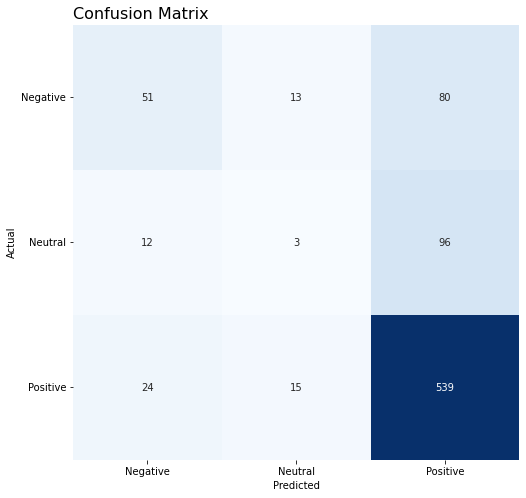

In [ ]:
classes=['Negative','Neutral','Positive']
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_matrix(df_textblob['rating_of_the_product'],df_textblob['Sentiment']), annot=True, 
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(classes)
ax.set_yticklabels(classes, rotation=0)
plt.show()

### Sentiword

In [ ]:
df_sentiword = df[['clean_text','clean_summary','rating_of_the_product']].reset_index()
df_sentiword["id"] = df_sentiword.index + 1
df_sentiword['Merged']= df_sentiword['clean_text'] +str(' ')+ df_sentiword['clean_summary']
df_sentiword.head()

,index,clean_text,clean_summary,rating_of_the_product,id,Merged
0,10192,really love reading program use year old grand...,I really love reading program I use ...,Positive,1,really love reading program use year old grand...
1,1358,version wrote pretty scathing review amazon ca...,Leaps Bounds Ahead Old Versions,Positive,2,version wrote pretty scathing review amazon ca...
2,6595,windows worst mistake microsoft history sad fo...,Microsoft biggest software mistake ...,Negative,3,windows worst mistake microsoft history sad fo...
3,8546,job no problems got refund days nothing much c...,usuaL,Neutral,4,job no problems got refund days nothing much c...
4,11102,better years ago not really useful,One Star,Negative,5,better years ago not really useful One Star


In [ ]:

df_sentiword["Merged"]=df_sentiword["Merged"].apply(lambda x:word_tokenize(x))
df_sentiword.head()

,index,clean_text,clean_summary,rating_of_the_product,id,Merged
0,10192,really love reading program use year old grand...,I really love reading program I use ...,Positive,1,"[really, love, reading, program, use, year, ol..."
1,1358,version wrote pretty scathing review amazon ca...,Leaps Bounds Ahead Old Versions,Positive,2,"[version, wrote, pretty, scathing, review, ama..."
2,6595,windows worst mistake microsoft history sad fo...,Microsoft biggest software mistake ...,Negative,3,"[windows, worst, mistake, microsoft, history, ..."
3,8546,job no problems got refund days nothing much c...,usuaL,Neutral,4,"[job, no, problems, got, refund, days, nothing..."
4,11102,better years ago not really useful,One Star,Negative,5,"[better, years, ago, not, really, useful, One,..."


In [ ]:
import spacy
from nltk.corpus import sentiwordnet as swn
from IPython.display import clear_output
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
lemmatizer = WordNetLemmatizer()

df_sentiword["Merged"] = df_sentiword["Merged"].apply(lambda x:[w for w in x if w in lemmatizer.lemmatize(w)])

     

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df_sentiword.head()

,index,clean_text,clean_summary,rating_of_the_product,id,Merged
0,10192,really love reading program use year old grand...,I really love reading program I use ...,Positive,1,"[really, love, reading, program, use, year, ol..."
1,1358,version wrote pretty scathing review amazon ca...,Leaps Bounds Ahead Old Versions,Positive,2,"[version, wrote, pretty, scathing, review, ama..."
2,6595,windows worst mistake microsoft history sad fo...,Microsoft biggest software mistake ...,Negative,3,"[worst, mistake, microsoft, history, sad, four..."
3,8546,job no problems got refund days nothing much c...,usuaL,Neutral,4,"[job, no, got, refund, nothing, much, changed,..."
4,11102,better years ago not really useful,One Star,Negative,5,"[better, ago, not, really, useful, One, Star]"


In [ ]:
nltk.download('sentiwordnet')

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [ ]:
pos=neg=obj=count=0
df_sentiword["pos"]=df_sentiword["Merged"].apply(lambda x:nltk.pos_tag(x))
     

In [ ]:
df_sentiword.head()

,index,clean_text,clean_summary,rating_of_the_product,id,Merged,pos
0,10192,really love reading program use year old grand...,I really love reading program I use ...,Positive,1,"[really, love, reading, program, use, year, ol...","[(really, RB), (love, VB), (reading, VBG), (pr..."
1,1358,version wrote pretty scathing review amazon ca...,Leaps Bounds Ahead Old Versions,Positive,2,"[version, wrote, pretty, scathing, review, ama...","[(version, NN), (wrote, VBD), (pretty, RB), (s..."
2,6595,windows worst mistake microsoft history sad fo...,Microsoft biggest software mistake ...,Negative,3,"[worst, mistake, microsoft, history, sad, four...","[(worst, RB), (mistake, VB), (microsoft, JJ), ..."
3,8546,job no problems got refund days nothing much c...,usuaL,Neutral,4,"[job, no, got, refund, nothing, much, changed,...","[(job, NN), (no, DT), (got, VBD), (refund, RB)..."
4,11102,better years ago not really useful,One Star,Negative,5,"[better, ago, not, really, useful, One, Star]","[(better, RB), (ago, RB), (not, RB), (really, ..."


In [ ]:
import ssl
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None
def get_sentiscore(word,tag):
      wn_tag = penn_to_wn(tag)
    
      if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []
      synsets = wn.synsets(word, pos=wn_tag)
      if not synsets:
        return []

    # Take the first sense, the most common
      synset = synsets[0]
      swn_synset = swn.senti_synset(synset.name())

      return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]
      pos=neg=obj=count=0
senti_score = []
for i in df_sentiword['pos']:
    senti_val = [get_sentiscore(x,y) for (x,y) in i]
    for score in senti_val:
        try:
            pos = pos + score[1]  #positive score is stored at 2nd position
            neg = neg + score[2]  #negative score is stored at 3rd position
        except:
            continue
    senti_score.append(pos - neg)
    pos=neg=0    
    
df_sentiword['senti_score'] = senti_score
df_sentiword.head()

,index,clean_text,clean_summary,rating_of_the_product,id,Merged,pos,senti_score
0,10192,really love reading program use year old grand...,I really love reading program I use ...,Positive,1,"[really, love, reading, program, use, year, ol...","[(really, RB), (love, VB), (reading, VBG), (pr...",2.750
1,1358,version wrote pretty scathing review amazon ca...,Leaps Bounds Ahead Old Versions,Positive,2,"[version, wrote, pretty, scathing, review, ama...","[(version, NN), (wrote, VBD), (pretty, RB), (s...",3.375
2,6595,windows worst mistake microsoft history sad fo...,Microsoft biggest software mistake ...,Negative,3,"[worst, mistake, microsoft, history, sad, four...","[(worst, RB), (mistake, VB), (microsoft, JJ), ...",-1.875
3,8546,job no problems got refund days nothing much c...,usuaL,Neutral,4,"[job, no, got, refund, nothing, much, changed,...","[(job, NN), (no, DT), (got, VBD), (refund, RB)...",-0.125
4,11102,better years ago not really useful,One Star,Negative,5,"[better, ago, not, really, useful, One, Star]","[(better, RB), (ago, RB), (not, RB), (really, ...",0.875


In [ ]:

df_sentiword['Sentiment'] = df_sentiword['senti_score'].apply(sentiment_score)
df_sentiword.head(10)


,index,clean_text,clean_summary,rating_of_the_product,id,Merged,pos,senti_score,Sentiment
0,10192,really love reading program use year old grand...,I really love reading program I use ...,Positive,1,"[really, love, reading, program, use, year, ol...","[(really, RB), (love, VB), (reading, VBG), (pr...",2.750,Positive
1,1358,version wrote pretty scathing review amazon ca...,Leaps Bounds Ahead Old Versions,Positive,2,"[version, wrote, pretty, scathing, review, ama...","[(version, NN), (wrote, VBD), (pretty, RB), (s...",3.375,Positive
2,6595,windows worst mistake microsoft history sad fo...,Microsoft biggest software mistake ...,Negative,3,"[worst, mistake, microsoft, history, sad, four...","[(worst, RB), (mistake, VB), (microsoft, JJ), ...",-1.875,Negative
3,8546,job no problems got refund days nothing much c...,usuaL,Neutral,4,"[job, no, got, refund, nothing, much, changed,...","[(job, NN), (no, DT), (got, VBD), (refund, RB)...",-0.125,Negative
4,11102,better years ago not really useful,One Star,Negative,5,"[better, ago, not, really, useful, One, Star]","[(better, RB), (ago, RB), (not, RB), (really, ...",0.875,Positive
5,8,also taken local community college line course...,Excellent value price,Positive,6,"[also, taken, local, community, college, line,...","[(also, RB), (taken, VBN), (local, JJ), (commu...",1.625,Positive
6,311,great product advanced knowledge needed take f...,All around great security solution SOHO,Positive,7,"[great, product, advanced, knowledge, needed, ...","[(great, JJ), (product, NN), (advanced, VBD), ...",0.625,Positive
7,181,grandson happy laptop,Five Stars,Positive,8,"[grandson, happy, laptop, Five, Stars]","[(grandson, NN), (happy, JJ), (laptop, JJ), (F...",0.875,Positive
8,2927,initially hesitant purchase instead turbo tax ...,Worked Well,Positive,9,"[initially, hesitant, purchase, instead, turbo...","[(initially, RB), (hesitant, JJ), (purchase, N...",-1.250,Negative
9,2444,bought g powerbook platinum mhz last version i...,Get wo n't disappointed . iMovie not installed...,Positive,10,"[bought, g, powerbook, platinum, mhz, last, ve...","[(bought, VBN), (g, NNS), (powerbook, VBP), (p...",-1.500,Negative


In [ ]:
df_sentiword['Sentiment'].value_counts()





Positive    568
Negative    228
Neutral      37
Name: Sentiment, dtype: int64

In [ ]:
accuracy_score(df_sentiword['rating_of_the_product'],df_sentiword['Sentiment'])

0.6290516206482593

In [ ]:
print(classification_report(df_sentiword['rating_of_the_product'],df_sentiword['Sentiment']))

              precision    recall  f1-score   support

    Negative       0.33      0.52      0.40       144
     Neutral       0.11      0.04      0.05       111
    Positive       0.78      0.77      0.78       578

    accuracy                           0.63       833
   macro avg       0.41      0.44      0.41       833
weighted avg       0.61      0.63      0.62       833



In [ ]:

print(confusion_matrix(df_sentiword['rating_of_the_product'],df_sentiword['Sentiment']))

[[ 75  13  56]
 [ 40   4  67]
 [113  20 445]]


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

conf_matrix=confusion_matrix(df_sentiword['rating_of_the_product'],df_sentiword['Sentiment'])

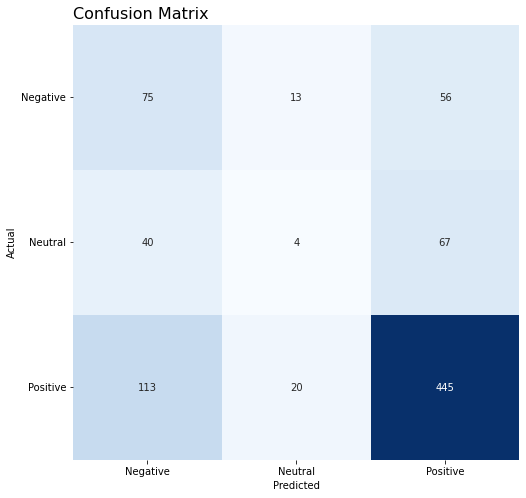

In [ ]:
classes=['Negative','Neutral','Positive']
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_matrix(df_sentiword['rating_of_the_product'],df_sentiword['Sentiment']), annot=True, 
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(classes)
ax.set_yticklabels(classes, rotation=0)
plt.show()